# Plotting Pandas data frames

In [1]:
%matplotlib inline

import numpy
import pandas
import matplotlib.pyplot as plt

Pandas data frames (and Series, which are 1 column data frames) have build in plotting functions that eventually call matplotlib plotting functions. This makes it very easy to generate plots based on Pandas data frames.

2000-01-01    0.217128
2000-01-02   -1.216589
2000-01-03   -2.599594
2000-01-04   -2.543216
2000-01-05   -2.852260
Freq: D, dtype: float64


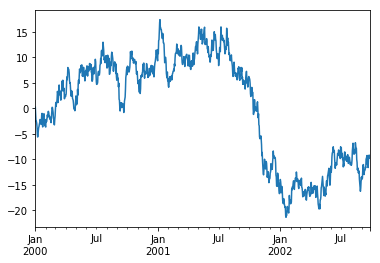

In [2]:
ts = pandas.Series(numpy.random.randn(1000), 
                   index=pandas.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print( ts[:5] )

ts.plot()

Pandas has relatively smart default settings for plotting more than one column.

                   A         B         C         D
2000-01-01  0.322938  1.254213  0.407411  0.178054
2000-01-02 -0.096147  2.707125 -0.297976  0.925884
2000-01-03  0.623123  4.156826  0.790127  1.926435
2000-01-04  1.138580  4.251426  0.217989  0.271605
2000-01-05  0.804724  4.360429  1.185985 -1.775524


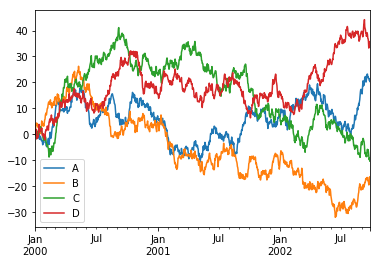

In [3]:
df = pandas.DataFrame(numpy.random.randn(1000, 4), 
                      index=ts.index, columns=list('ABCD'))
df = df.cumsum()
print( df[:5] )

df.plot()

You can easily override the defaults and specify what varaibles are on the X and Y axes.

          B         C  A
0  0.302834  0.856900  0
1  1.514327  2.014446  1
2  0.444085  0.285252  2
3  0.101062 -0.058987  3
4  1.042898 -0.224697  4
5  1.090381  1.903552  5
6  1.257334  2.363759  6
7  1.927432  1.884541  7
8  2.766373  1.960421  8
9  2.123877  1.272009  9


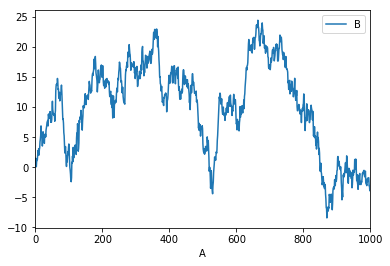

In [4]:
df3 = pandas.DataFrame(numpy.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pandas.Series(list(range(len(df))))
print(df3[:10])

df3.plot(x='A', y='B')

The type of the plot can be specified by the optional parameter `kind`. For examle,

Bar plots:

          A         B        C         D
0 -0.231024 -1.152618 -1.15832  1.234623


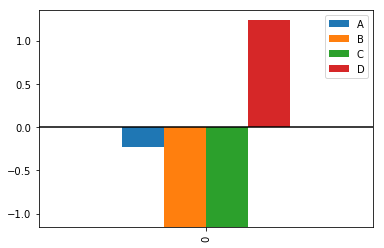

In [5]:
df = pandas.DataFrame(numpy.random.randn(1, 4), columns=list('ABCD'))
print( df )

df.plot(kind='bar')

# add a horizontal line at 0
plt.axhline(0, color='k')

Or by directly calling sub-functions:

          a         b         c         d
0  0.892642  0.263105  0.896833  0.583923
1  0.336677  0.984349  0.923844  0.187568
2  0.913922  0.537169  0.437394  0.650324
3  0.794580  0.927516  0.549012  0.896748
4  0.355789  0.053591  0.969461  0.179714
5  0.829166  0.224032  0.700986  0.086765
6  0.488163  0.431337  0.516943  0.172706
7  0.725917  0.088296  0.013094  0.495069
8  0.442324  0.313239  0.276057  0.497456
9  0.074143  0.647500  0.510606  0.810349


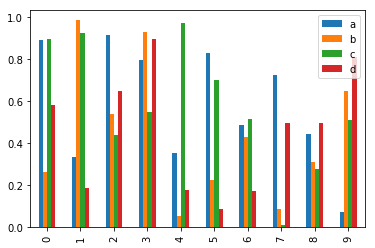

In [6]:
df2 = pandas.DataFrame(numpy.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
print(df2)

df2.plot.bar()

Histograms:

          a         b         c
0  1.025235  0.195020  0.360232
1 -0.957312  0.850639 -1.370527
2  0.832072 -0.333055  0.247095
3  1.670203 -0.096560 -1.175640
4 -0.974763 -0.009357 -1.621580
5  0.344745  1.115951 -0.002985
6  0.921052 -0.497005 -0.183496
7 -0.047435 -0.751849 -1.322017
8  1.947588  0.075092  0.701016
9  1.168224 -0.164935 -0.918121


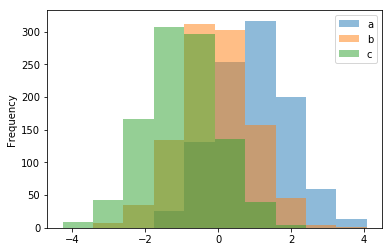

In [7]:
df4 = pandas.DataFrame({'a': numpy.random.randn(1000) + 1, 'b': numpy.random.randn(1000), 
                    'c': numpy.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
print( df4[:10] )

df4.plot.hist(alpha=0.5)

                   A         B         C         D
2000-01-01  0.324781  0.995368 -1.415085 -1.114732
2000-01-02 -2.042692  0.452529  0.089243  2.312905
2000-01-03  0.696091 -0.267638 -0.367297 -0.573411
2000-01-04 -2.377968  0.426194  1.479221  1.986417
2000-01-05 -1.167283  0.324905 -2.780544 -0.500906


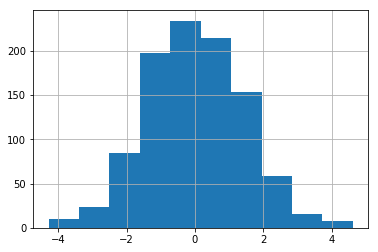

In [9]:
df = pandas.DataFrame(numpy.random.randn(1000, 4), 
                      index=ts.index, columns=list('ABCD'))
print(df[:5])

df['A'].diff().hist()

Unfortunately, some of the default plotting settings are subtly different in Pandas. The default for the  `<dataframe>.plot.hist()` function (shown above) plots multiple columns on the same plot with different colors.

The `<dataframe>.hist()` function by default plots each column in a separate sub-plot (see below).

You often need to consult the documentation or explicitly build the plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fb1e9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fe0f630>]], dtype=object)

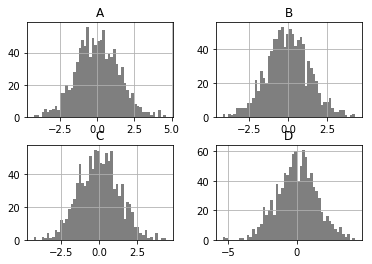

In [10]:
df.diff().hist(color='k', alpha=0.5, bins=50)

Box plots:

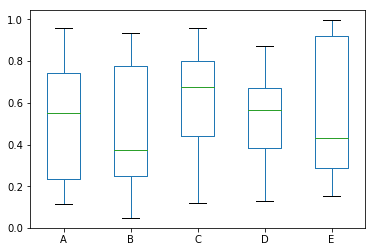

In [11]:
df = pandas.DataFrame(numpy.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot.box()

Use the `by` optional parameter to specify how to split a plot into multiple facets:

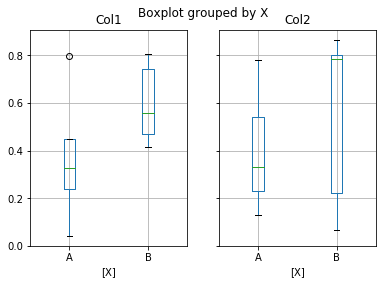

In [12]:
df = pandas.DataFrame(numpy.random.rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pandas.Series(['A','A','A','A','A','B','B','B','B','B'])

bp = df.boxplot(by='X')

Scatter plots:

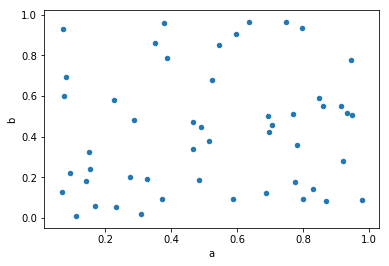

In [13]:
df = pandas.DataFrame(numpy.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x='a', y='b');

Coloring points by another variable:

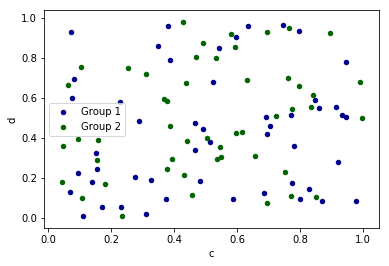

In [14]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

These are just a few examples, nearly every type of matplotlib plot can be created using a Pandas dataframe. Check out the Pandas documentation on plotting and visualization for more information: https://pandas.pydata.org/pandas-docs/stable/visualization.html